In [155]:
import pandas as pd #veri setini okuma
import numpy as np #kullanmadık
import matplotlib.pyplot as plt #değerleri görselleştirme
import seaborn as sns #kullanmadık

In [156]:
df= pd.read_csv('natural_disasters_2024.csv')

In [157]:
df.head(10)

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08
5,6,Tornado,China,2.717113,2024-01-01 05:00:00,3534,5.744655e+08
6,7,Hurricane,India,6.491891,2024-01-01 06:00:00,8220,3.424286e+08
7,8,Earthquake,China,2.652747,2024-01-01 07:00:00,2261,6.975549e+08
8,9,Flood,Brazil,8.157574,2024-01-01 08:00:00,5016,7.209609e+08
9,10,Flood,India,1.024187,2024-01-01 09:00:00,5135,9.985833e+08


In [158]:
#Date sütünü boş olduğundan sildik
df= df.drop('Date',axis=1)

In [175]:
df.info()
#İnt türünde id ve ölüm değerleri
#ülke ve felaket türü object(string türünde)
#büyüklük değeri ve ekonomik kayıp float tipinde
#veri seti ülkelerde oluşan doğal afetleri bu afetlerin büyüklüklerini , maddi kayıplarını ve insan kayıplarını sunmakta.
#hiçbir boş verimiz olmadığından boş değer doldurma ihtiyacımız olmadı , date sutünü boş olduğundan o sütünü sildik


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_ID       10000 non-null  int64  
 1   Disaster_Type     10000 non-null  object 
 2   Location          10000 non-null  object 
 3   Magnitude         10000 non-null  float64
 4   Fatalities        10000 non-null  int64  
 5   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


In [159]:
#En çok kaybın verildiği olay
maksKayip= df.sort_values('Fatalities',ascending=False)
maksKayip.head(1)

,Disaster_ID,Disaster_Type,Location,Magnitude,Fatalities,Economic_Loss($)
5904,5905,Earthquake,Japan,4.837283,9999,8.698903e+08


In [160]:
#Toplam kaybı en çok olan felaket ve sayısı
max_KayipFelaket=df.groupby('Disaster_Type')['Fatalities'].sum().sort_values(ascending=False)
max_KayipFelaket.head(1)

,Fatalities
Disaster_Type,
Earthquake,10095826


In [161]:
#Mali kaybı en çok olan afet türü ve verdiği toplam zarar
max_Mali=df.groupby('Disaster_Type')['Economic_Loss($)'].sum().sort_values(ascending=False)
max_Mali.head(1)

,Economic_Loss($)
Disaster_Type,
Flood,1.022281e+12


In [162]:
#Toplam ölümün en çok olduğu bölge
max_KayipBolge=df.groupby('Location')['Fatalities'].sum().sort_values(ascending=False)
max_KayipBolge.head(1)

,Fatalities
Location,
Brazil,8807328


In [163]:
#Toplam maliyetin en çok olduğu bölge
max_MaliBolge=df.groupby('Location')['Economic_Loss($)'].sum().sort_values(ascending=False)
max_MaliBolge.head(1)

,Economic_Loss($)
Location,
Brazil,8.752558e+11


In [164]:
#Tüm bölgelerde en çok gerçekleşen felaket
max_FelaketBolge=df.groupby('Disaster_Type').count().sort_values('Location',ascending=False)
max_FelaketBolge.head(1)

,Disaster_ID,Location,Magnitude,Fatalities,Economic_Loss($)
Disaster_Type,,,,,
Earthquake,2036,2036,2036,2036,2036


In [165]:
#Orman yangının en çok olduğu bölge
max_OrmanBolge=df.query("Disaster_Type=='Wildfire'")['Location'].value_counts().sort_values(ascending=False)
max_OrmanBolge.head(1)

,count
Location,
India,347


In [166]:
#Sel felaketinin en şiddetli gerçekleştiği bölge ve şiddeti
max_BuyuklukSelBolge= df.query('Disaster_Type=="Flood"').groupby('Location')['Magnitude'].max().sort_values(ascending=False)
max_BuyuklukSelBolge.head(1)

,Magnitude
Location,
Brazil,9.997423


In [167]:
#Yangın felaketinin ortalama şiddeti
mod_DegerFelaketBuyukluk=df.query('Disaster_Type=="Wildfire"')['Magnitude'].abs().sum()/len(df.query('Disaster_Type=="Wildfire"'))
mod_DegerFelaketBuyukluk

5.609703143248001

In [168]:
#Deprem felaketinin en şiddetli gerçekleştiği bölge ve şiddeti
max_BuyuklukDepremBolge= df.query('Disaster_Type=="Earthquake"').groupby('Location')['Magnitude'].max().sort_values(ascending=False)
max_BuyuklukDepremBolge.head(1)

,Magnitude
Location,
India,9.997471


In [169]:
#Toplam maliyetin en az olduğu bölge
max_MaliBolge=df.groupby('Location')['Economic_Loss($)'].sum().sort_values()
max_MaliBolge.head(1)

,Economic_Loss($)
Location,
Indonesia,8.151030e+11


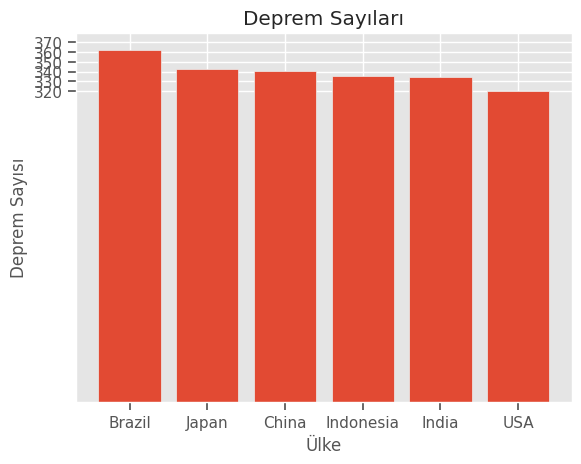

In [170]:
#Ülkelerde oluşan deprem felaketi sayılarının bar grafiğiyle gösterimi
y=df.query('Disaster_Type=="Earthquake"')['Location'].value_counts()
plt.style.use('ggplot')
plt.xlabel('Ülke')
plt.ylabel('Deprem Sayısı')
plt.title('Deprem Sayıları')
plt.yticks(range(320,380,10))
plt.bar(y.index,y)

plt.show()

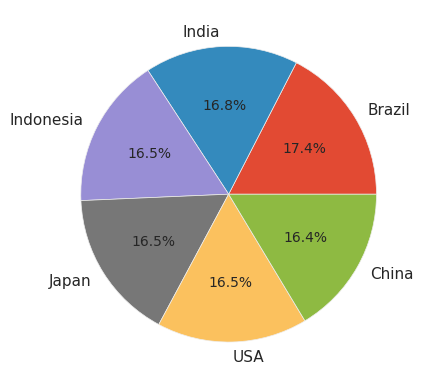

In [171]:
#verilen değerlerde ülkelerin olma oranı
plt.pie(df['Location'].value_counts(),labels=df['Location'].value_counts().index,autopct='%1.1f%%')
plt.show()

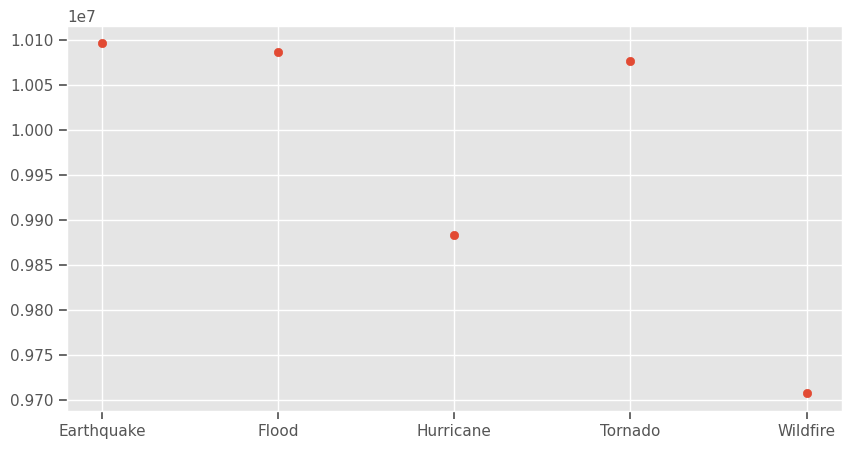

In [172]:
#Felakete göre toplam ölüm sayısının grafiği
x=df.groupby('Disaster_Type')['Fatalities'].sum()
plt.figure(figsize=(10,5))
plt.scatter(x.index,x)
plt.show()

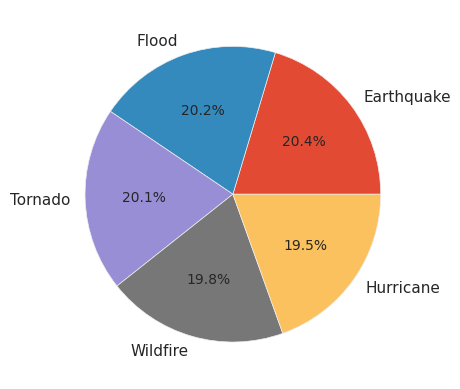

In [173]:
#Felaketlerin oranlarının daire grafiğinde gösterimi
plt.pie(df['Disaster_Type'].value_counts(),labels=df['Disaster_Type'].value_counts().index,autopct='%1.1f%%')
plt.show()